# Importing libraries

In [19]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [5]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential # class of NN
from keras.layers import Convolution2D # class for adding convulution
from keras.layers import MaxPooling2D # pooling layer class
from keras.layers import Flatten # flatten layer class
from keras.layers import Dense, Dropout # other normal layers in NN
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from joblib import dump, load

In [6]:
os.listdir('datasets')

['test_set', 'training_set']

### Initialising the CNN

In [7]:
classifier = Sequential()

classifier.add(Convolution2D(filters = 16,
                            kernel_size = (5, 5),
                            input_shape = (512, 512, 1),
                            activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))
classifier.add(Convolution2D(filters = 32,
                            kernel_size = (5, 5),
                            activation = 'relu'))

### Adding a second maxpooling layer

In [8]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

### Flattening

In [9]:
classifier.add(Flatten())

### Full connection

In [10]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

### Compiling the CNN

In [11]:
classifier.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 508, 508, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 254, 254, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 254, 254, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 125, 125, 32)      0

In [13]:
def to_grayscale_then_rgb(image):
    # image = tf.image.rgb_to_grayscale(image)
    # image = tf.image.grayscale_to_rgb(image)
    return image

In [14]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                    preprocessing_function = to_grayscale_then_rgb)

test_datagen = ImageDataGenerator(rescale = 1/255, preprocessing_function = to_grayscale_then_rgb)

In [15]:
tr = train_datagen.flow_from_directory(
        'datasets/training_set',
        target_size = (512, 512),
        batch_size = 2,
        class_mode = 'binary',
        color_mode = 'grayscale')

tx = test_datagen.flow_from_directory(
        'datasets/test_set',
        target_size = (512, 512),
        batch_size = 2,
        class_mode = 'binary',
        color_mode = 'grayscale')

Found 200 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [16]:
tr.image_shape

(512, 512, 1)

In [17]:
tx.image_shape

(512, 512, 1)

In [20]:
history = classifier.fit(tr,
                        steps_per_epoch = 5,
                        epochs = 50,
                        validation_data = tx,
                        validation_steps = 20)

Epoch 1/50
5/5 [==============================] - 48s 10s/step - loss: 9.4605 - accuracy: 0.6000 - val_loss: 0.7177 - val_accuracy: 0.6250
Epoch 2/50
5/5 [==============================] - 37s 8s/step - loss: 2.9456 - accuracy: 0.7000 - val_loss: 0.7001 - val_accuracy: 0.4750
Epoch 3/50
5/5 [==============================] - 36s 8s/step - loss: 0.9820 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5250
Epoch 4/50
5/5 [==============================] - 34s 8s/step - loss: 0.6965 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 5/50
5/5 [==============================] - 35s 8s/step - loss: 0.6928 - accuracy: 0.6000 - val_loss: 0.6932 - val_accuracy: 0.4750
Epoch 6/50
5/5 [==============================] - 35s 8s/step - loss: 0.6938 - accuracy: 0.4000 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 7/50
5/5 [==============================] - 39s 9s/step - loss: 0.6921 - accuracy: 0.8000 - val_loss: 0.6933 - val_accuracy: 0.4750
Epoch 8/50
5/5 [=================

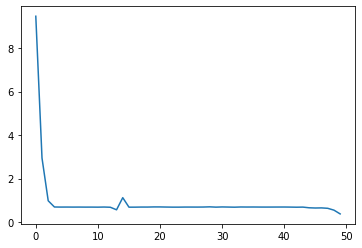

In [21]:
plt.plot(history.history['loss'])

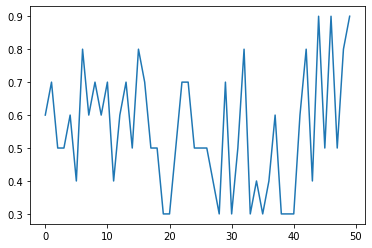

In [22]:
plt.plot(history.history['accuracy'])

In [23]:
classifier.evaluate(tx)

60/60 [==============================] - 39s 653ms/step - loss: 0.5450 - accuracy: 0.7167


[0.5449702143669128, 0.7166666388511658]

In [24]:
model_dict = {
    'title' : 'Handwritting Recognition Model',
    'classifier' : classifier
}

dump(model_dict,"hand_rec_ap.pkl")

INFO:tensorflow:Assets written to: ram://2c4a3112-0cce-40f0-ba12-6953dde4b041/assets


INFO:tensorflow:Assets written to: ram://2c4a3112-0cce-40f0-ba12-6953dde4b041/assets


['hand_rec_ap.pkl']

In [25]:
def load_model():
    filepath = 'hand_rec_ap.pkl'
    return load(filepath)

In [26]:
classifier.save('classifier.h5')

In [28]:
classifier = tf.keras.models.load_model('classifier.h5')

In [33]:
img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/test_set/Akash/01.jpg',color_mode='grayscale',target_size=(512,512,1))
xinp = tf.keras.utils.img_to_array(img)
np.array([xinp]).shape

(1, 512, 512, 1)

In [40]:
img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/test_set/Anmol/01.jpg',color_mode='grayscale',target_size=(512,512,1))
xinp = tf.keras.utils.img_to_array(img)
pred = classifier.predict(np.array([xinp]))[0]
print(pred)

1/1 [==============================] - 1s 764ms/step
[0.]


In [42]:
if pred < .5:
    print('first person')
else:
    print('second person')

first person


In [43]:
classifier.predict(tx)

60/60 [==============================] - 57s 936ms/step


array([[0.01989641],
       [0.08995356],
       [0.3447532 ],
       [0.4257364 ],
       [0.1354878 ],
       [0.28647366],
       [0.48419794],
       [0.49921265],
       [0.5215864 ],
       [0.39845955],
       [0.27860948],
       [0.22225122],
       [0.29289007],
       [0.04087849],
       [0.5135278 ],
       [0.49041277],
       [0.50544786],
       [0.49958843],
       [0.49972793],
       [0.37855226],
       [0.2313251 ],
       [0.44461447],
       [0.53622144],
       [0.651636  ],
       [0.4515657 ],
       [0.4719949 ],
       [0.01032673],
       [0.22833307],
       [0.25027406],
       [0.35408843],
       [0.50688624],
       [0.08183926],
       [0.4955448 ],
       [0.33522296],
       [0.33783108],
       [0.46984428],
       [0.21998282],
       [0.41290694],
       [0.39011478],
       [0.5791484 ],
       [0.33348078],
       [0.47569114],
       [0.23463188],
       [0.53536916],
       [0.43535617],
       [0.05071784],
       [0.727459  ],
       [0.473

In [44]:
ans = []
for i in range(11,50):
    img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/training_set\Akash\{i}.jpg',color_mode='grayscale',target_size=(512,512,1))
    xinp = tf.keras.utils.img_to_array(img)
    pred = classifier.predict(np.array([xinp]))[0]
    print(pred)

    if pred < .5:
        print('first person')
        ans.append(0)
    else:
        print('second person')
        ans.append(1)

1/1 [==============================] - 1s 1s/step
[1.9216622e-30]
first person
1/1 [==============================] - 1s 1s/step
[0.]
first person
1/1 [==============================] - 1s 885ms/step
[0.]
first person
1/1 [==============================] - 1s 928ms/step
[0.]
first person
1/1 [==============================] - 1s 693ms/step
[0.]
first person
1/1 [==============================] - 1s 692ms/step
[0.]
first person
1/1 [==============================] - 1s 595ms/step
[0.]
first person
1/1 [==============================] - 1s 642ms/step
[0.]
first person
1/1 [==============================] - 1s 615ms/step
[0.]
first person
1/1 [==============================] - 1s 1s/step
[0.]
first person
1/1 [==============================] - 1s 736ms/step
[0.]
first person
1/1 [==============================] - 1s 763ms/step
[4.110564e-20]
first person
1/1 [==============================] - 1s 822ms/step
[0.]
first person
1/1 [==============================] - 1s 972ms/step
[0.]
first p

In [45]:
print(ans)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [46]:
ans = []
for i in range(11,50):
    img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/training_set\Anmol\{i}.jpg',color_mode='grayscale',target_size=(512,512,1))
    xinp = tf.keras.utils.img_to_array(img)
    pred = classifier.predict(np.array([xinp]))[0]
    print(pred)

    if pred < .5:
        print('first person')
        ans.append(0)
    else:
        print('second person')
        ans.append(1)

1/1 [==============================] - 1s 1s/step
[1.]
second person
1/1 [==============================] - 1s 902ms/step
[0.]
first person
1/1 [==============================] - 1s 841ms/step
[0.9999442]
second person
1/1 [==============================] - 1s 752ms/step
[1.]
second person
1/1 [==============================] - 1s 611ms/step
[0.0013564]
first person
1/1 [==============================] - 1s 614ms/step
[4.028442e-06]
first person
1/1 [==============================] - 1s 560ms/step
[0.]
first person
1/1 [==============================] - 1s 693ms/step
[1.]
second person
1/1 [==============================] - 1s 760ms/step
[0.35855067]
first person
1/1 [==============================] - 1s 967ms/step
[6.073611e-11]
first person
1/1 [==============================] - 0s 498ms/step
[1.]
second person
1/1 [==============================] - 0s 448ms/step
[0.8312011]
second person
1/1 [==============================] - 0s 493ms/step
[3.071763e-11]
first person
1/1 [==========

In [47]:
print(ans)

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]
